# Project Description: 
This program predicts employee attrition through Logistics Regression model.
It is advantageous for company to know what factors leads a employee towards the decision to
leave the company or not. From predicted model, the company can gain insights and have immersive understanding to build strategy, develop retention programs to keep as many employees as possible


## Step 1: Prepare data 

In [116]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression



In [117]:
import os 

In [118]:
# Read dataset 
EA = pd.read_csv('Employee Atrrition - Employee Atrrition.csv')
#print the first 5 rows of data
EA.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Step 2: Data exploratory Analysis

### 2.1 Check some characteristics of data and clean the data

In [119]:
#get some info from data and make inferences about the data
EA.shape
EA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The result above shows that there are no missing values in the dataframe. So we don't need drop columns with missing value or imputate missing values into any cells.  

In [120]:
#view some statistics
EA.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [121]:
#Check for any duplicate rows
duplicate_rows = EA[EA.duplicated()]
duplicate_rows.shape[0]

0

<AxesSubplot:xlabel='Age'>

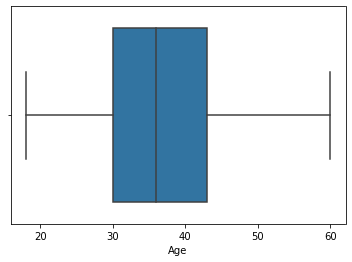

In [6]:
#detect outliers
sns.boxplot(x = EA['Age'])

<AxesSubplot:xlabel='DailyRate'>

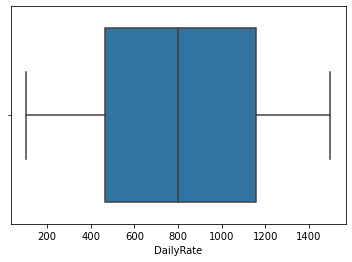

In [8]:
sns.boxplot(x = EA['DailyRate'])

<AxesSubplot:xlabel='DistanceFromHome'>

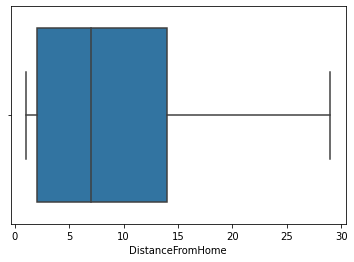

In [21]:
sns.boxplot(x = EA['DistanceFromHome'])

<AxesSubplot:xlabel='Education'>

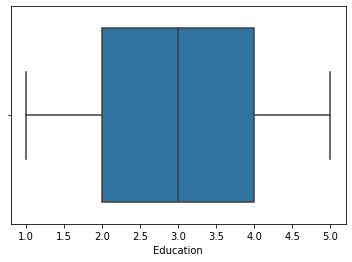

In [23]:
sns.boxplot(x = EA['Education'])

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

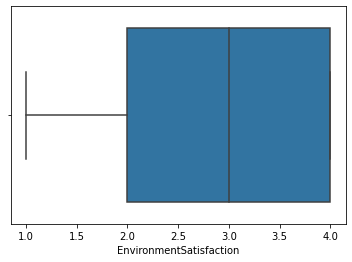

In [24]:
sns.boxplot(x = EA['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='HourlyRate'>

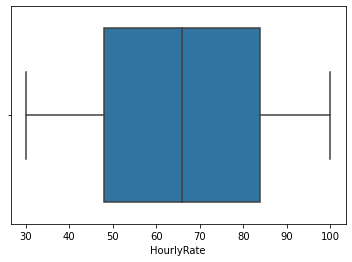

In [25]:
sns.boxplot(x = EA['HourlyRate'])

<AxesSubplot:xlabel='JobInvolvement'>

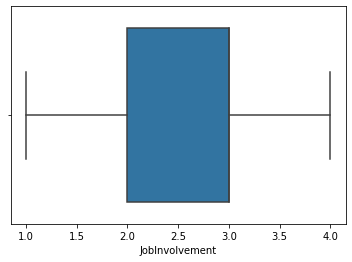

In [26]:
sns.boxplot(x = EA['JobInvolvement'])

<AxesSubplot:xlabel='JobSatisfaction'>

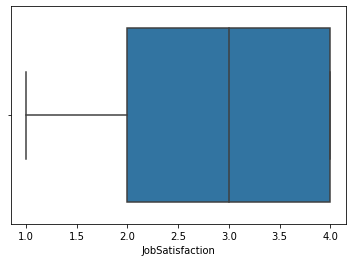

In [27]:
sns.boxplot(x = EA['JobSatisfaction'])

<AxesSubplot:xlabel='MonthlyIncome'>

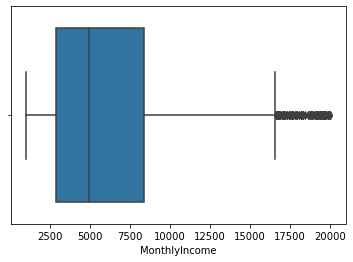

In [29]:
sns.boxplot(x = EA['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyRate'>

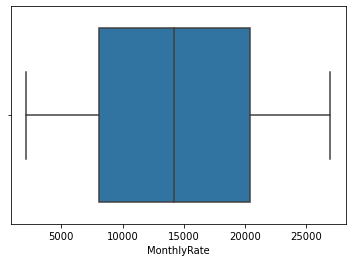

In [35]:
sns.boxplot(x = EA['MonthlyRate'])

<AxesSubplot:xlabel='NumCompaniesWorked'>

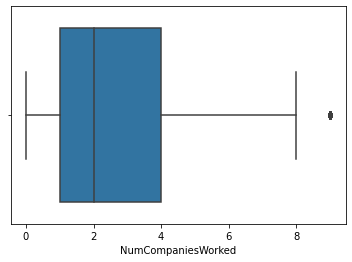

In [36]:
sns.boxplot(x = EA['NumCompaniesWorked'])

<AxesSubplot:xlabel='NumCompaniesWorked'>

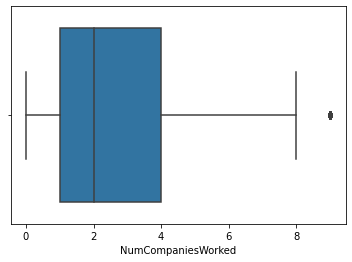

In [37]:
sns.boxplot(x = EA['NumCompaniesWorked'])

<AxesSubplot:xlabel='PercentSalaryHike'>

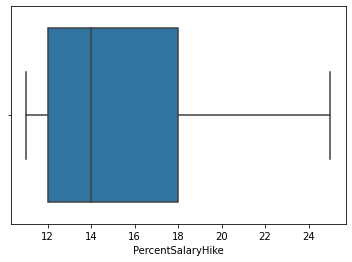

In [38]:
sns.boxplot(x = EA['PercentSalaryHike'])

<AxesSubplot:xlabel='PerformanceRating'>

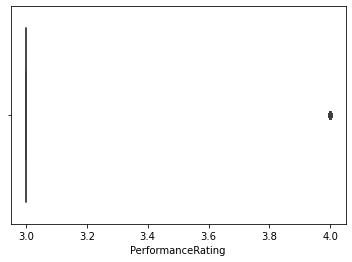

In [39]:
sns.boxplot(x = EA['PerformanceRating'])

In [40]:
EA['PerformanceRating'].describe()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

<AxesSubplot:xlabel='RelationshipSatisfaction'>

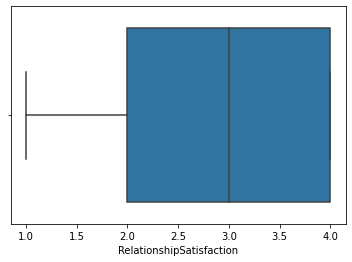

In [41]:
sns.boxplot(x = EA['RelationshipSatisfaction'])

<AxesSubplot:xlabel='StandardHours'>

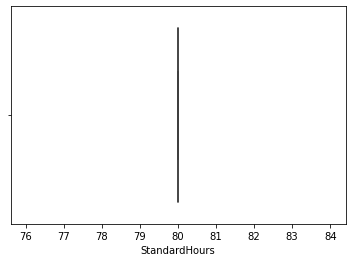

In [42]:
sns.boxplot(x = EA['StandardHours'])

<AxesSubplot:xlabel='StockOptionLevel'>

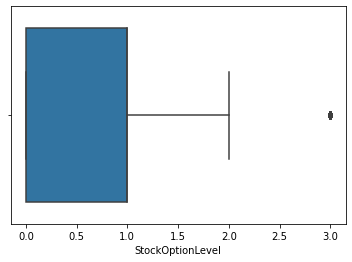

In [43]:
sns.boxplot(x = EA['StockOptionLevel'])

<AxesSubplot:xlabel='TotalWorkingYears'>

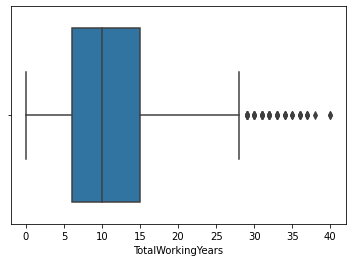

In [44]:
sns.boxplot(x = EA['TotalWorkingYears'])

<AxesSubplot:xlabel='TrainingTimesLastYear'>

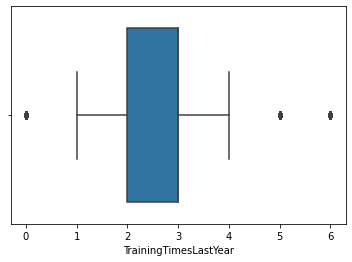

In [45]:
sns.boxplot(x = EA['TrainingTimesLastYear'])

<AxesSubplot:xlabel='WorkLifeBalance'>

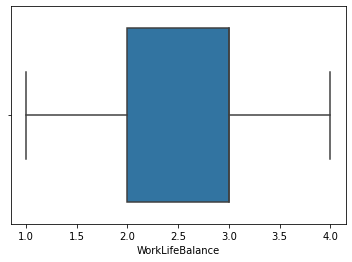

In [46]:
sns.boxplot(x = EA['WorkLifeBalance'])

<AxesSubplot:xlabel='YearsAtCompany'>

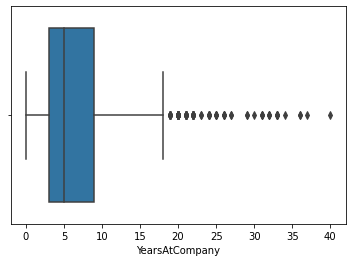

In [47]:
sns.boxplot(x = EA['YearsAtCompany'])

<AxesSubplot:xlabel='YearsInCurrentRole'>

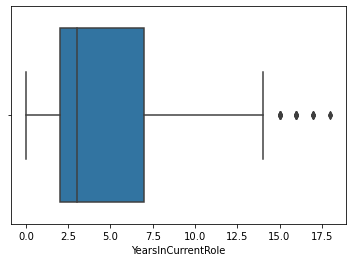

In [48]:
sns.boxplot(x = EA['YearsInCurrentRole'])

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

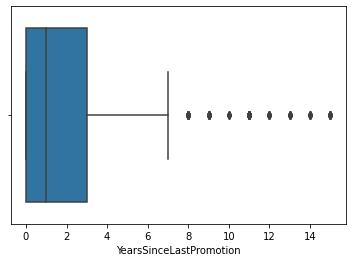

In [49]:
sns.boxplot(x = EA['YearsSinceLastPromotion'])

<AxesSubplot:xlabel='YearsWithCurrManager'>

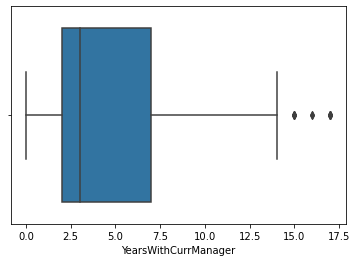

In [50]:
sns.boxplot(x = EA['YearsWithCurrManager'])

#### Remove outliers

In [122]:
#finding the IQR
YWCMq25 = EA['YearsWithCurrManager'].quantile(0.25)
YWCMq75 = EA['YearsWithCurrManager'].quantile(0.75)
iqr1 = YWCMq75-YWCMq25

In [123]:
#calculate upper limit and lower limit
upper1 = YWCMq75 + 1.5 * iqr1
lower1 = YWCMq25 - 1.5 * iqr1

In [124]:
#trim data
EA = EA[(EA['YearsWithCurrManager'] < upper1) & (EA['YearsWithCurrManager'] >lower1)]
EA

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [125]:
YACq25 = EA['YearsAtCompany'].quantile(0.25)
YACq75 = EA['YearsAtCompany'].quantile(0.75)
iqr2 = YACq75-YACq25
iqr2

6.0

In [126]:
upper2 = YACq75 + 1.5 * iqr2
lower2 = YACq25 - 1.5 * iqr2

In [127]:
EA = EA[(EA['YearsAtCompany'] < upper2) & (EA['YearsAtCompany'] >lower2)]
EA

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [128]:
YSLPq25 = EA['YearsSinceLastPromotion'].quantile(0.25)
YSLPq75 = EA['YearsSinceLastPromotion'].quantile(0.75)
iqr3 = YSLPq75 - YSLPq25
iqr3

2.0

In [129]:
upper3 = YSLPq75 + 1.5 * iqr3
lower3 = YSLPq25 - 1.5 * iqr3

In [130]:
EA = EA[(EA['YearsSinceLastPromotion'] < upper3) & (EA['YearsSinceLastPromotion'] >lower3)]
EA

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [131]:
YICRq25 = EA['YearsInCurrentRole'].quantile(0.25)
YICRq75 = EA['YearsInCurrentRole'].quantile(0.75)
iqr4 = YICRq75 - YICRq25
iqr4

3.0

In [132]:
upper4 = YICRq75 + 1.5 * iqr4
lower4 = YICRq25 - 1.5 * iqr4

In [133]:
EA = EA[(EA['YearsInCurrentRole'] < upper4) & (EA['YearsInCurrentRole'] >lower4)]
EA

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [137]:
TTLYq25 = EA['TrainingTimesLastYear'].quantile(0.25)
TTLYq75 = EA['TrainingTimesLastYear'].quantile(0.75)
iqr5 = TTLYq75 - TTLYq25
iqr5

1.0

In [138]:
upper5 = TTLYq75 + 1.5 * iqr5
lower5 = TTLYq25 - 1.5 * iqr5

In [139]:
EA = EA[(EA['TrainingTimesLastYear'] < upper5) & (EA['TrainingTimesLastYear'] >lower5)]
EA

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [140]:
EA['Attrition'].value_counts()
# there are 1233 employees who are still currently in the company
# and 237 that has left the company.

No     759
Yes    166
Name: Attrition, dtype: int64

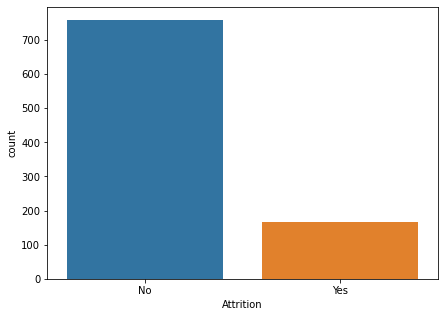

In [96]:
#Visualize the number of employee responses 
plt.figure(figsize=(7, 5))
sns.countplot(data=EA, x='Attrition')
plt.show()

### 2.2 Determine meaningful input variables for modelling process

In [141]:
EA['EmployeeCount'].unique()

array([1], dtype=int64)

In [156]:
EA['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [142]:
EA['EmployeeNumber'].unique()

array([   2,    4,    5,    7,    8,   10,   11,   12,   15,   16,   18,
         19,   22,   24,   27,   28,   31,   35,   38,   39,   45,   46,
         47,   49,   51,   52,   53,   55,   57,   61,   62,   63,   64,
         65,   68,   70,   72,   74,   75,   76,   77,   84,   85,   86,
         88,   91,   94,   95,   96,   97,   98,  101,  102,  103,  104,
        105,  106,  110,  112,  113,  116,  118,  120,  121,  128,  129,
        132,  133,  134,  139,  140,  141,  142,  143,  147,  148,  150,
        151,  152,  155,  159,  160,  161,  164,  167,  169,  171,  174,
        175,  176,  179,  183,  190,  192,  193,  194,  195,  197,  198,
        200,  201,  204,  205,  207,  208,  211,  214,  216,  218,  221,
        223,  224,  227,  230,  231,  233,  240,  241,  242,  243,  245,
        247,  249,  250,  260,  261,  262,  267,  271,  273,  274,  277,
        281,  282,  283,  284,  286,  288,  293,  298,  300,  303,  305,
        306,  308,  314,  315,  316,  321,  323,  3

In [143]:
EA['StandardHours'].unique()

array([80], dtype=int64)

In [ ]:
EA['Over18'].unique()

In [ ]:
EA['OverTime'].unique()

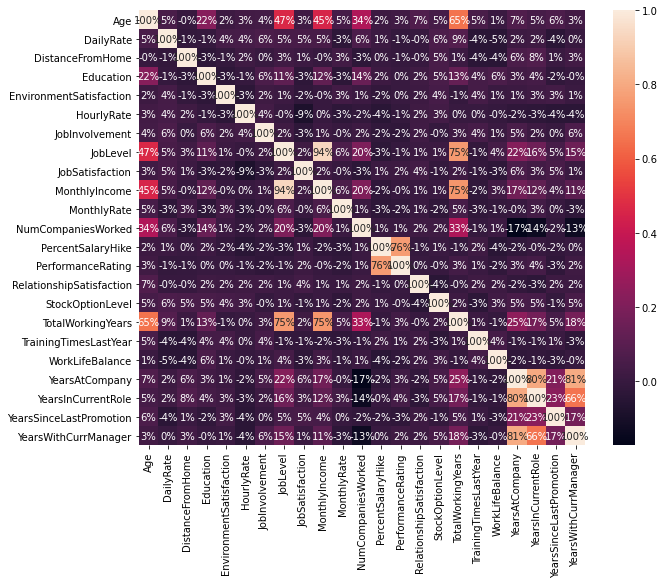

In [114]:
#draw heatmap to get correlation
plt.figure(figsize=(10,8))
sns.heatmap(EA.corr(), annot = True, fmt='.0%')
plt.show()

In [97]:
# drop all columns which are not required for the analysis
EA = EA.drop(['Over18'], axis =1)
EA =EA.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis =1)

In [98]:
# Split data into categorical variables columns and numerical variables columns
EA_object = EA.select_dtypes(include=['object']).copy()
EA_object.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No


In [99]:
EA_object.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [100]:
# transform categorical variables to numerical variables by setting dummy variable
EA_obj_int = pd.get_dummies(EA_object[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']], drop_first = True)

In [101]:
EA_obj_int.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [102]:
EA_number = EA.select_dtypes(include = 'int64')

In [103]:
EA_number.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
5,32,1005,2,2,4,79,3,1,4,3068,...,3,3,0,8,2,2,7,7,3,6


In [104]:
#join two types of columns together
EA_final = pd.concat([EA_obj_int, EA_number], axis = 1)
EA_final.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0,1,0,1,0,1,0,0,0,0,...,4,4,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,...,3,2,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,...,3,4,1,6,3,3,2,2,2,2
5,0,1,0,1,0,1,0,0,0,0,...,3,3,0,8,2,2,7,7,3,6


In [105]:
EA_final.dtypes

Attrition_Yes                        uint8
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Research & Development    uint8
Department_Sales                     uint8
EducationField_Life Sciences         uint8
EducationField_Marketing             uint8
EducationField_Medical               uint8
EducationField_Other                 uint8
EducationField_Technical Degree      uint8
Gender_Male                          uint8
JobRole_Human Resources              uint8
JobRole_Laboratory Technician        uint8
JobRole_Manager                      uint8
JobRole_Manufacturing Director       uint8
JobRole_Research Director            uint8
JobRole_Research Scientist           uint8
JobRole_Sales Executive              uint8
JobRole_Sales Representative         uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
OverTime_Yes                         uint8
Age                                  int64
DailyRate  

## Modelling process

In [106]:
#divide dataset into train_data and test_data
from sklearn.model_selection import train_test_split
X = EA_final.drop('Attrition_Yes', axis=1)
Y=EA_final['Attrition_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=45)


In [107]:
#import my model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter =5000)
#fitting and predict your model
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [108]:
print(model.coef_)
print(model.intercept_)

[[ 9.16671565e-01  9.74257740e-02 -1.55532447e-01  3.86990921e-01
  -2.04423694e-01  2.37081422e-01 -1.35922784e-01 -2.70546176e-02
   2.71284945e-01  6.08596108e-01  6.75660585e-02  6.15899537e-01
   1.34515178e-02 -2.11992089e-01 -1.11464937e-01 -3.83243233e-01
  -2.59973642e-02  4.63197379e-01 -1.68615631e-01  6.05249686e-01
   1.79815109e+00 -3.90375087e-02 -4.55950624e-04  4.89475249e-02
   1.59276569e-01 -4.67044931e-01  4.41861102e-03 -4.59341163e-01
   4.41063686e-02 -4.23763247e-01 -1.51724409e-04  3.11060459e-05
   2.05037423e-01 -4.09745649e-02  8.27382387e-01 -2.69106379e-01
  -2.19845268e-01 -4.09083860e-02  6.25128499e-02 -1.49301045e-01
  -6.51783463e-03 -9.55762610e-02  3.11216674e-02 -2.39814051e-02]]
[0.30962056]


In [109]:
from sklearn.metrics import mean_absolute_error, confusion_matrix
print("Root MAE of this model is", mean_absolute_error(Y_test, predictions) )


Root MAE of this model is 15.2


In [110]:
confusion_matrix(Y_test, predictions)

array([[152,   7],
       [ 11,  15]], dtype=int64)

In [111]:
#calculate accuracy to check how accurate my result are 
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test, predictions)

0.9027027027027027

In [144]:
#Comparing Y_test with prediction 
pd.DataFrame({'Y_test':Y_test, 'Prediction':predictions})

,Y_test,Prediction
1231,0,0
422,1,0
195,0,0
340,0,0
1325,0,0
...,...,...
527,0,0
1127,0,0
260,0,0
921,0,0
